## 0.Import

In [5]:
# ================================================================
# Complete reproduction of the paper: "Wine feature importance and quality prediction:
# A comparative study of machine learning algorithms with unbalanced data"
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Complete Implementation of the Paper: 'Wine feature importance and quality prediction'")
print("=" * 80)

Complete Implementation of the Paper: 'Wine feature importance and quality prediction'


## 1.Data Loading

In [7]:
# Step 1: Data Loading
print("\n1. Loading data...")

def load_wine_data(file_path):
    """
    Load wine quality data with proper handling of semicolon or comma separation
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        first_line = f.readline()
    
    if ';' in first_line:
        return pd.read_csv(file_path, sep=';')
    else:
        return pd.read_csv(file_path)

try:
    red_wine = load_wine_data('wine+quality/winequality-red.csv')
    print(f"Red wine dataset loaded: {red_wine.shape[0]} rows and {red_wine.shape[1]} columns")
except Exception as e:
    print(f"Error loading red wine dataset: {e}")
    exit(1)


print("First 5 rows:")
print(red_wine.head())

print("\nFirst row data:")
print(red_wine.iloc[0])

print("\nColumn name:")
print(red_wine.columns.tolist())

print("\nDictionaly:")
first_row_dict = red_wine.iloc[0].to_dict()
for key, value in first_row_dict.items():
    print(f"{key}: {value}")

print("\nbasic informatin:")
print(red_wine.info())

print("\nStatistic information:")
print(red_wine.describe())


1. Loading data...
Red wine dataset loaded: 1599 rows and 12 columns
First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

  

## 2.Data preprocessing (based on section 3.2 of the paper)

In [9]:
# Remove duplicates
initial_rows = red_wine.shape[0]
red_wine = red_wine.drop_duplicates()
removed_duplicates = initial_rows - red_wine.shape[0]
print(f"  Removed {removed_duplicates} duplicate entries")

# Remove missing values
missing_values = red_wine.isnull().sum().sum()
red_wine = red_wine.dropna()
print(f"  Processed {missing_values} missing values")

print("First 5 rows:")
print(red_wine.head())

print("\nFirst row data:")
print(red_wine.iloc[0])

print("\nColumn name:")
print(red_wine.columns.tolist())

print("\nDictionaly:")
first_row_dict = red_wine.iloc[0].to_dict()
for key, value in first_row_dict.items():
    print(f"{key}: {value}")

print("\nbasic informatin:")
print(red_wine.info())

print("\nStatistic information:")
print(red_wine.describe())


  Removed 240 duplicate entries
  Processed 0 missing values
First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol 

## 3.Feature selection (excluding residual sugar as per the paper)

In [11]:
# Step 3: Feature selection (excluding residual sugar as per the paper)
print("\n3. Feature selection...")
correlation_matrix = red_wine.corr()
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)
print("Correlation with quality:")
print(quality_correlation)


# Select all features except residual sugar (as per the paper)
selected_features = [col for col in red_wine.columns if col != 'residual sugar' and col != 'quality']
print("\nSelected features:")
print(selected_features)



3. Feature selection...
Correlation with quality:
quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

Selected features:
['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## Step 4: Quality categorization (based on section 3.2 of the paper)

Wine category distribution:
quality_category
0      63
1    1112
2     184
Name: count, dtype: int64


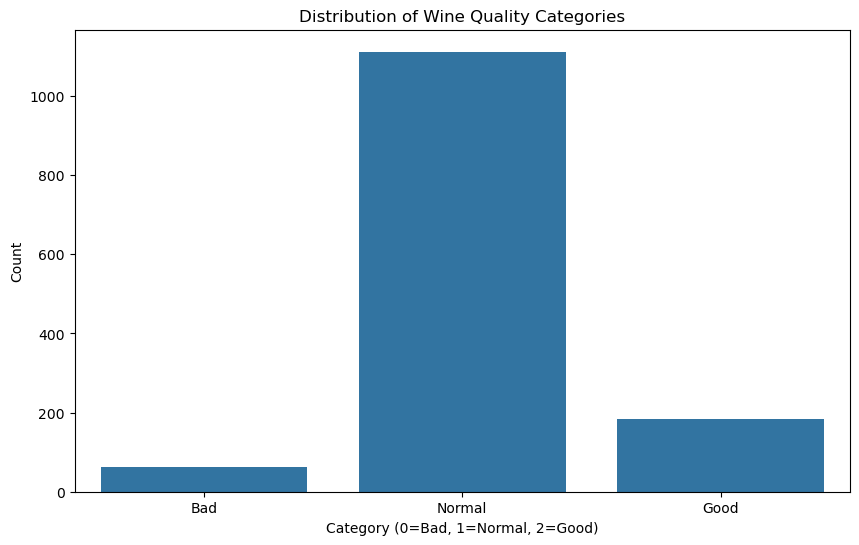

First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  quality_category  
0      9.4        5             

In [13]:
def encode_quality(quality):
    """
    Encode wine quality into categories as specified in the paper:
    - Bad wine: quality < 5
    - Normal wine: 5 <= quality <= 6
    - Good wine: 7 <= quality <= 10
    """
    if quality < 5:
        return 0  # Bad wine
    elif 5 <= quality <= 6:
        return 1  # Normal wine
    else:  # quality >= 7
        return 2  # Good wine

red_wine['quality_category'] = red_wine['quality'].apply(encode_quality)

# Check distribution after encoding
category_counts = red_wine['quality_category'].value_counts().sort_index()
print("Wine category distribution:")
print(category_counts)

# Visualize category distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='quality_category', data=red_wine)
plt.title('Distribution of Wine Quality Categories')
plt.xlabel('Category (0=Bad, 1=Normal, 2=Good)')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Bad', 'Normal', 'Good'])
plt.show('wine_quality_categories.png')
plt.close()

print("First 5 rows:")
print(red_wine.head())

print("\nFirst row data:")
print(red_wine.iloc[0])

print("\nColumn name:")
print(red_wine.columns.tolist())

print("\nDictionaly:")
first_row_dict = red_wine.iloc[0].to_dict()
for key, value in first_row_dict.items():
    print(f"{key}: {value}")

print("\nbasic informatin:")
print(red_wine.info())

print("\nStatistic information:")
print(red_wine.describe())


## Step 5: Data standardization & Step 6: Train-test split

In [17]:
# Checking excluding column(residual sugar)
print("\nColumn name:")
print(red_wine[selected_features].columns.tolist())


# Step 5: Data standardization
X = red_wine[selected_features]
y = red_wine['quality_category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

# Step 6: Train-test split
print("\n6. Train-test split...")
# ==============================================================
# ==================YOU CAN USE THIS TEST MODEL==================
# ==============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print(f"  Training data: {X_train.shape[0]} samples")
print(f"  Test data: {X_test.shape[0]} samples")




Column name:
['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

6. Train-test split...
  Training data: 1087 samples
  Test data: 272 samples


## Step 7: Apply SMOTE (key contribution of the paper)


7. Handling imbalanced data with SMOTE...
  Class distribution before SMOTE:
quality_category
0     50
1    890
2    147
Name: count, dtype: int64
  Class distribution after SMOTE:
quality_category
0    890
1    890
2    890
Name: count, dtype: int64
  Original training data: 1087 samples
  Training data after SMOTE: 2670 samples


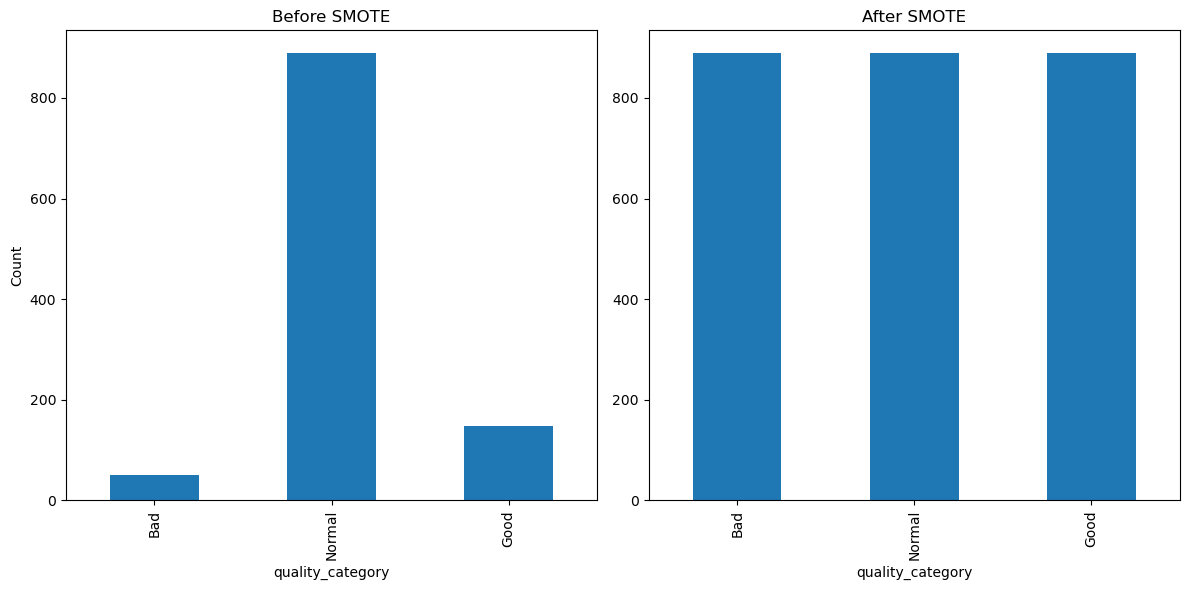

In [19]:
# Step 7: Apply SMOTE (key contribution of the paper)
print("\n7. Handling imbalanced data with SMOTE...")
print("  Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts().sort_index())


smote = SMOTE(random_state=42)
# ==============================================================
# ==================YOU CAN USE THIS TRAIN MODEL==================
# ==============================================================
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("  Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts().sort_index())

print(f"  Original training data: {X_train.shape[0]} samples")
print(f"  Training data after SMOTE: {X_train_balanced.shape[0]} samples")

# Visualize class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
pd.Series(y_train).value_counts().sort_index().plot(
    kind='bar', ax=ax[0], title='Before SMOTE'
)
ax[0].set_xticklabels(['Bad', 'Normal', 'Good'])
ax[0].set_ylabel('Count')

pd.Series(y_train_balanced).value_counts().sort_index().plot(
    kind='bar', ax=ax[1], title='After SMOTE'
)
ax[1].set_xticklabels(['Bad', 'Normal', 'Good'])
plt.tight_layout()
plt.show('smote_comparison.png')
plt.close()

## Dicision Tree

In [61]:
# =============================================================================
# SECTION 1: Decision Tree Performance BEFORE SMOTE (Imbalanced Data)
# =============================================================================

# Import necessary modules for decision tree modeling and evaluation
from sklearn.tree import DecisionTreeClassifier       # For creating the decision tree model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluation metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Assume X_train, y_train are the original (imbalanced) training data,
# and X_test, y_test are the held-out test data.

# Create a Decision Tree classifier with a fixed random state for reproducibility
dt_before_smote = DecisionTreeClassifier(random_state=42)

# Fit the decision tree model using the original imbalanced training data
dt_before_smote.fit(X_train, y_train)

# Predict target values on the test data using the model trained on imbalanced data
y_pred_before = dt_before_smote.predict(X_test)

# Calculate the accuracy score on the test data
accuracy_before = accuracy_score(y_test, y_pred_before)

# Print evaluation results for the imbalanced (before SMOTE) data
print("=== Decision Tree Performance BEFORE SMOTE (Imbalanced Data) ===")
print("Accuracy (Before SMOTE):", accuracy_before)
print("Classification Report (Before SMOTE):\n", classification_report(y_test, y_pred_before))
print("Confusion Matrix (Before SMOTE):\n", confusion_matrix(y_test, y_pred_before))

=== Decision Tree Performance BEFORE SMOTE (Imbalanced Data) ===
Accuracy (Before SMOTE): 0.7463235294117647
Classification Report (Before SMOTE):
               precision    recall  f1-score   support

           0       0.10      0.08      0.09        13
           1       0.86      0.83      0.84       222
           2       0.38      0.49      0.42        37

    accuracy                           0.75       272
   macro avg       0.44      0.46      0.45       272
weighted avg       0.76      0.75      0.75       272

Confusion Matrix (Before SMOTE):
 [[  1  11   1]
 [  9 184  29]
 [  0  19  18]]


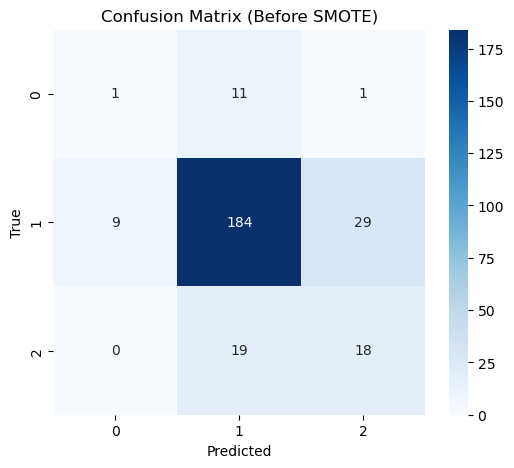

In [63]:
# =============================================================================
# Plot: Confusion Matrix for Before SMOTE Model
# =============================================================================
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_before), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Before SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

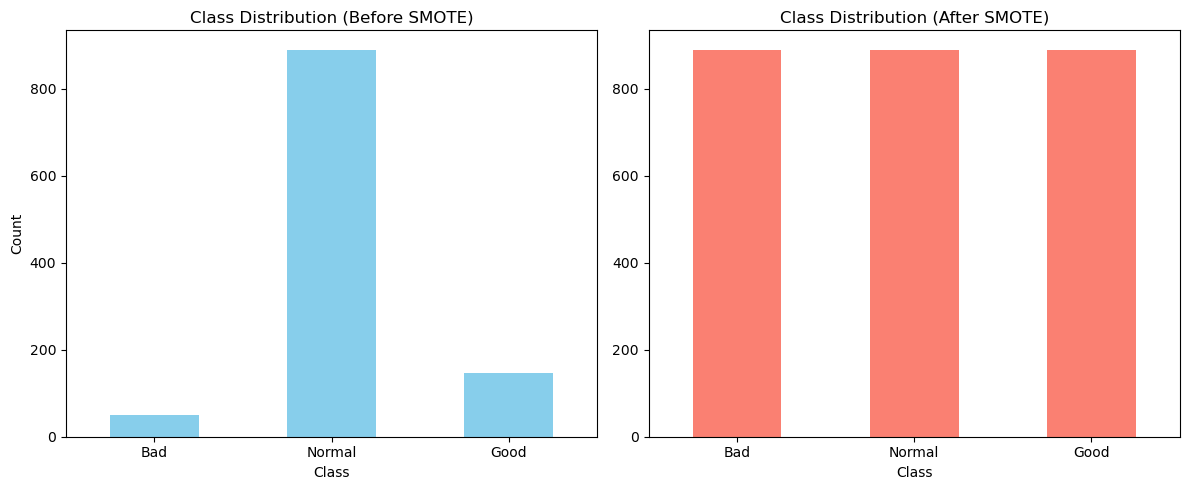

In [65]:
# =============================================================================
# SECTION 2: Decision Tree Performance AFTER SMOTE (Balanced Data)
# =============================================================================

# SMOTE is applied to balance the training data.
from imblearn.over_sampling import SMOTE

# Apply SMOTE to original training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Plot: Class Distribution Before and After SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
pd.Series(y_train).value_counts().sort_index().plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title("Class Distribution (Before SMOTE)")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")
ax[0].set_xticklabels(['Bad', 'Normal', 'Good'], rotation=0)

pd.Series(y_train_balanced).value_counts().sort_index().plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title("Class Distribution (After SMOTE)")
ax[1].set_xlabel("Class")
ax[1].set_xticklabels(['Bad', 'Normal', 'Good'], rotation=0)
plt.tight_layout()
plt.show()

In [67]:
# Create a Decision Tree classifier using the SMOTE-balanced data
dt_after_smote = DecisionTreeClassifier(random_state=42)
dt_after_smote.fit(X_train_balanced, y_train_balanced)
y_pred_after = dt_after_smote.predict(X_test)
accuracy_after = accuracy_score(y_test, y_pred_after)

print("\n=== Decision Tree Performance AFTER SMOTE (Balanced Data) ===")
print("Accuracy (After SMOTE):", accuracy_after)
print("Classification Report (After SMOTE):\n", classification_report(y_test, y_pred_after))
print("Confusion Matrix (After SMOTE):\n", confusion_matrix(y_test, y_pred_after))


=== Decision Tree Performance AFTER SMOTE (Balanced Data) ===
Accuracy (After SMOTE): 0.6691176470588235
Classification Report (After SMOTE):
               precision    recall  f1-score   support

           0       0.16      0.46      0.24        13
           1       0.88      0.69      0.77       222
           2       0.37      0.62      0.46        37

    accuracy                           0.67       272
   macro avg       0.47      0.59      0.49       272
weighted avg       0.78      0.67      0.71       272

Confusion Matrix (After SMOTE):
 [[  6   7   0]
 [ 30 153  39]
 [  1  13  23]]


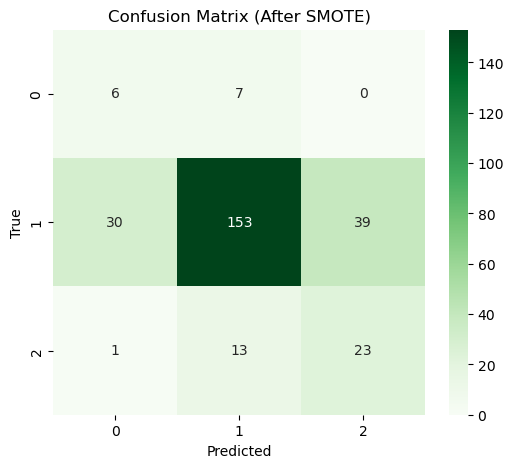

In [69]:
# =============================================================================
# Plot: Confusion Matrix for After SMOTE Model
# =============================================================================
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_after), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (After SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [71]:
# =============================================================================
# SECTION 3: Hyperparameter Tuning on SMOTE Data to Improve Accuracy (After SMOTE)
# =============================================================================

from sklearn.model_selection import GridSearchCV

# Define grid for hyperparameter tuning on SMOTE data
param_grid_smote = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search_smote = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                 param_grid_smote,
                                 cv=5,
                                 scoring='accuracy',
                                 n_jobs=-1)
grid_search_smote.fit(X_train_balanced, y_train_balanced)

print("\n=== Hyperparameter Tuning Results (After SMOTE) ===")
print("Best Hyperparameters (After SMOTE):", grid_search_smote.best_params_)

best_dt_smote = grid_search_smote.best_estimator_
y_pred_optimized_smote = best_dt_smote.predict(X_test)
accuracy_optimized_smote = accuracy_score(y_test, y_pred_optimized_smote)

print("Optimized Accuracy (After SMOTE with Tuning):", accuracy_optimized_smote)
print("Classification Report (Optimized After SMOTE):\n", classification_report(y_test, y_pred_optimized_smote))
print("Confusion Matrix (Optimized After SMOTE):\n", confusion_matrix(y_test, y_pred_optimized_smote))



=== Hyperparameter Tuning Results (After SMOTE) ===
Best Hyperparameters (After SMOTE): {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Optimized Accuracy (After SMOTE with Tuning): 0.6838235294117647
Classification Report (Optimized After SMOTE):
               precision    recall  f1-score   support

           0       0.13      0.31      0.19        13
           1       0.89      0.70      0.78       222
           2       0.39      0.70      0.50        37

    accuracy                           0.68       272
   macro avg       0.47      0.57      0.49       272
weighted avg       0.78      0.68      0.72       272

Confusion Matrix (Optimized After SMOTE):
 [[  4   9   0]
 [ 26 156  40]
 [  0  11  26]]


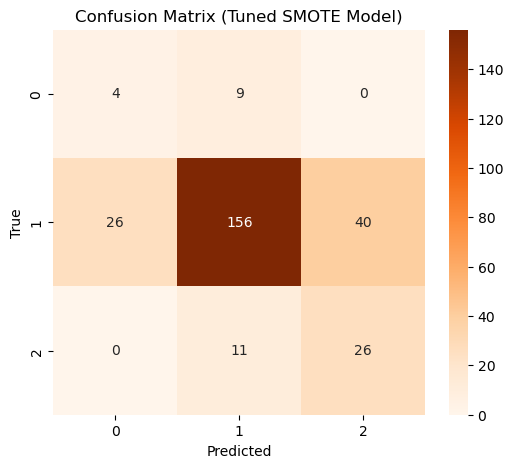

In [73]:
# =============================================================================
# Plot: GridSearchCV Best Score and Confusion Matrix for Tuned SMOTE Model
# =============================================================================
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_optimized_smote), annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix (Tuned SMOTE Model)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [75]:
# =============================================================================
# SECTION 4: Additional Experimentation: Cost-Complexity Pruning on SMOTE Data
# =============================================================================

# Compute cost complexity pruning path on SMOTE-balanced data
path_smote = dt_after_smote.cost_complexity_pruning_path(X_train_balanced, y_train_balanced)
ccp_alphas_smote = path_smote.ccp_alphas

pruned_models_smote = []
for alpha in ccp_alphas_smote[:-1]:
    pruned_dt_smote = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_dt_smote.fit(X_train_balanced, y_train_balanced)
    pruned_models_smote.append((alpha, pruned_dt_smote))

# Evaluate each pruned model
best_alpha_smote = None
best_accuracy_smote = 0.0
for alpha, model in pruned_models_smote:
    y_pred_pruned_smote = model.predict(X_test)
    current_accuracy_smote = accuracy_score(y_test, y_pred_pruned_smote)
    print(f"Alpha (After SMOTE): {alpha:.5f} -> Test Accuracy: {current_accuracy_smote:.4f}")
    if current_accuracy_smote > best_accuracy_smote:
        best_accuracy_smote = current_accuracy_smote
        best_alpha_smote = alpha

print("\nOptimal ccp_alpha (After SMOTE):", best_alpha_smote)
print("Best Accuracy from Pruned Models (After SMOTE):", best_accuracy_smote)

Alpha (After SMOTE): 0.00000 -> Test Accuracy: 0.6691
Alpha (After SMOTE): 0.00025 -> Test Accuracy: 0.6691
Alpha (After SMOTE): 0.00035 -> Test Accuracy: 0.6691
Alpha (After SMOTE): 0.00035 -> Test Accuracy: 0.6691
Alpha (After SMOTE): 0.00035 -> Test Accuracy: 0.6691
Alpha (After SMOTE): 0.00036 -> Test Accuracy: 0.6618
Alpha (After SMOTE): 0.00036 -> Test Accuracy: 0.6618
Alpha (After SMOTE): 0.00036 -> Test Accuracy: 0.6618
Alpha (After SMOTE): 0.00036 -> Test Accuracy: 0.6618
Alpha (After SMOTE): 0.00036 -> Test Accuracy: 0.6654
Alpha (After SMOTE): 0.00037 -> Test Accuracy: 0.6654
Alpha (After SMOTE): 0.00037 -> Test Accuracy: 0.6691
Alpha (After SMOTE): 0.00037 -> Test Accuracy: 0.6801
Alpha (After SMOTE): 0.00037 -> Test Accuracy: 0.6801
Alpha (After SMOTE): 0.00037 -> Test Accuracy: 0.6801
Alpha (After SMOTE): 0.00037 -> Test Accuracy: 0.6801
Alpha (After SMOTE): 0.00037 -> Test Accuracy: 0.6801
Alpha (After SMOTE): 0.00044 -> Test Accuracy: 0.6765
Alpha (After SMOTE): 0.00050

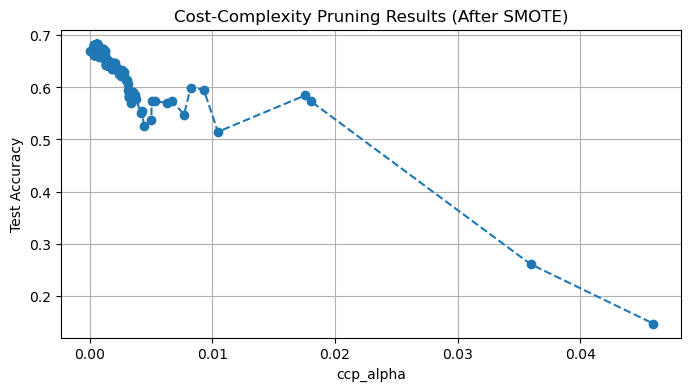

In [77]:
# =============================================================================
# Plot: Pruning Results for SMOTE Data
# =============================================================================
alphas = [alpha for alpha, model in pruned_models_smote]
accuracies = [accuracy_score(y_test, model.predict(X_test)) for alpha, model in pruned_models_smote]

plt.figure(figsize=(8,4))
plt.plot(alphas, accuracies, marker='o', linestyle='--')
plt.xlabel("ccp_alpha")
plt.ylabel("Test Accuracy")
plt.title("Cost-Complexity Pruning Results (After SMOTE)")
plt.grid(True)
plt.show()

In [79]:
# =============================================================================
# SECTION 5: Hyperparameter Tuning on Imbalanced Data (Before SMOTE)
# =============================================================================

# Define grid for hyperparameter tuning on the original imbalanced data
param_grid_before = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search_before = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                  param_grid_before,
                                  cv=5,
                                  scoring='accuracy',
                                  n_jobs=-1)
grid_search_before.fit(X_train, y_train)

print("\n=== Hyperparameter Tuning Results (Before SMOTE) ===")
print("Best Hyperparameters (Before SMOTE):", grid_search_before.best_params_)

best_dt_before = grid_search_before.best_estimator_
y_pred_optimized_before = best_dt_before.predict(X_test)
accuracy_optimized_before = accuracy_score(y_test, y_pred_optimized_before)

print("Optimized Accuracy (Before SMOTE with Tuning):", accuracy_optimized_before)
print("Classification Report (Optimized Before SMOTE):\n", classification_report(y_test, y_pred_optimized_before))
print("Confusion Matrix (Optimized Before SMOTE):\n", confusion_matrix(y_test, y_pred_optimized_before))


=== Hyperparameter Tuning Results (Before SMOTE) ===
Best Hyperparameters (Before SMOTE): {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Optimized Accuracy (Before SMOTE with Tuning): 0.8308823529411765
Classification Report (Optimized Before SMOTE):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.85      0.95      0.90       222
           2       0.64      0.38      0.47        37

    accuracy                           0.83       272
   macro avg       0.50      0.44      0.46       272
weighted avg       0.78      0.83      0.80       272

Confusion Matrix (Optimized Before SMOTE):
 [[  0  13   0]
 [  2 212   8]
 [  0  23  14]]


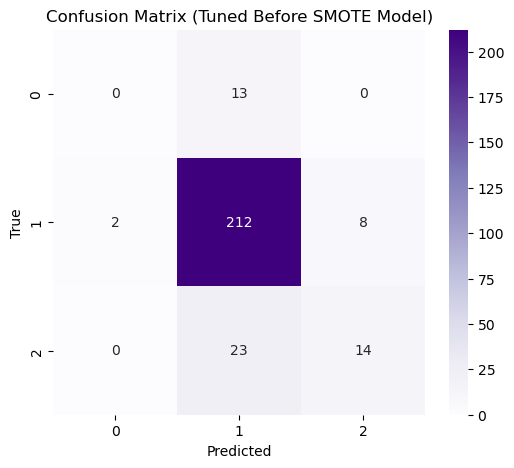

In [81]:
# =============================================================================
# Plot: Confusion Matrix for Tuned Imbalanced Model
# =============================================================================
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_optimized_before), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix (Tuned Before SMOTE Model)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [83]:
# =============================================================================
# SECTION 6: Additional Experimentation: Cost-Complexity Pruning on Imbalanced Data (Before SMOTE)
# =============================================================================

# Compute cost complexity pruning path on imbalanced data
path_before = dt_before_smote.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas_before = path_before.ccp_alphas

pruned_models_before = []
for alpha in ccp_alphas_before[:-1]:
    pruned_dt_before = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_dt_before.fit(X_train, y_train)
    pruned_models_before.append((alpha, pruned_dt_before))

best_alpha_before = None
best_accuracy_before = 0.0
for alpha, model in pruned_models_before:
    y_pred_pruned_before = model.predict(X_test)
    current_accuracy_before = accuracy_score(y_test, y_pred_pruned_before)
    print(f"Alpha (Before SMOTE): {alpha:.5f} -> Test Accuracy: {current_accuracy_before:.4f}")
    if current_accuracy_before > best_accuracy_before:
        best_accuracy_before = current_accuracy_before
        best_alpha_before = alpha

print("\nOptimal ccp_alpha (Before SMOTE):", best_alpha_before)
print("Best Accuracy from Pruned Models (Before SMOTE):", best_accuracy_before)

Alpha (Before SMOTE): 0.00000 -> Test Accuracy: 0.7463
Alpha (Before SMOTE): 0.00046 -> Test Accuracy: 0.7463
Alpha (Before SMOTE): 0.00060 -> Test Accuracy: 0.7463
Alpha (Before SMOTE): 0.00061 -> Test Accuracy: 0.7463
Alpha (Before SMOTE): 0.00072 -> Test Accuracy: 0.7537
Alpha (Before SMOTE): 0.00077 -> Test Accuracy: 0.7537
Alpha (Before SMOTE): 0.00085 -> Test Accuracy: 0.7537
Alpha (Before SMOTE): 0.00086 -> Test Accuracy: 0.7537
Alpha (Before SMOTE): 0.00086 -> Test Accuracy: 0.7574
Alpha (Before SMOTE): 0.00087 -> Test Accuracy: 0.7610
Alpha (Before SMOTE): 0.00087 -> Test Accuracy: 0.7610
Alpha (Before SMOTE): 0.00087 -> Test Accuracy: 0.7610
Alpha (Before SMOTE): 0.00087 -> Test Accuracy: 0.7610
Alpha (Before SMOTE): 0.00088 -> Test Accuracy: 0.7610
Alpha (Before SMOTE): 0.00089 -> Test Accuracy: 0.7647
Alpha (Before SMOTE): 0.00089 -> Test Accuracy: 0.7647
Alpha (Before SMOTE): 0.00090 -> Test Accuracy: 0.7647
Alpha (Before SMOTE): 0.00091 -> Test Accuracy: 0.7647
Alpha (Bef

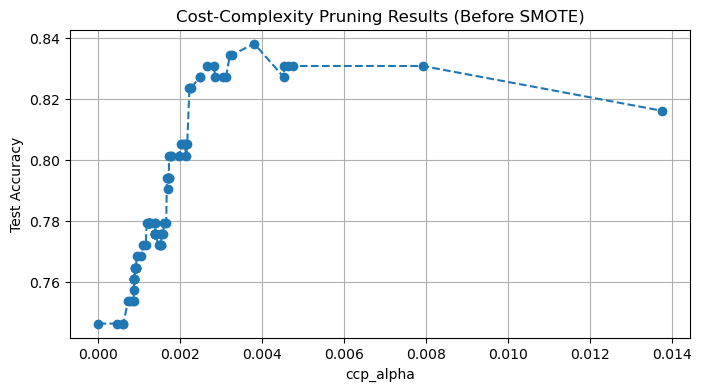

In [85]:
# =============================================================================
# Plot: Pruning Results for Imbalanced Data
# =============================================================================
alphas_before = [alpha for alpha, model in pruned_models_before]
accuracies_before = [accuracy_score(y_test, model.predict(X_test)) for alpha, model in pruned_models_before]

plt.figure(figsize=(8,4))
plt.plot(alphas_before, accuracies_before, marker='o', linestyle='--')
plt.xlabel("ccp_alpha")
plt.ylabel("Test Accuracy")
plt.title("Cost-Complexity Pruning Results (Before SMOTE)")
plt.grid(True)
plt.show()